# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 622


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'q={city}&appid={weather_api_key}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(f'{url}{city_url}')
        city_weather = city_weather.json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | atafu village
Processing Record 2 of Set 1 | qaqortoq
Processing Record 3 of Set 1 | ust-nera
Processing Record 4 of Set 1 | margaret river
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | georgetown
Processing Record 7 of Set 1 | tak
Processing Record 8 of Set 1 | basoko
Processing Record 9 of Set 1 | waddan
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | praia da vitoria
Processing Record 13 of Set 1 | vila franca do campo
Processing Record 14 of Set 1 | tarko-sale
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | hualien city
Processing Record 17 of Set 1 | iqaluit
Processing Record 18 of Set 1 | okhotsk
Processing Record 19 of Set 1 | noumea
Processing Record 20 of Set 1 | lysianka
Processing Record 21 of Set 1 | taiohae
City not found. Skipping...
Processing Record 22 of 

Processing Record 41 of Set 4 | ebon
Processing Record 42 of Set 4 | namibe
Processing Record 43 of Set 4 | laitila
Processing Record 44 of Set 4 | avarua
Processing Record 45 of Set 4 | east london
Processing Record 46 of Set 4 | aral
Processing Record 47 of Set 4 | vadso
Processing Record 48 of Set 4 | bridgewater
Processing Record 49 of Set 4 | amungan
Processing Record 0 of Set 5 | aykhal
Processing Record 1 of Set 5 | san pedro pochutla
Processing Record 2 of Set 5 | guantanamo
Processing Record 3 of Set 5 | scone
Processing Record 4 of Set 5 | liwale
Processing Record 5 of Set 5 | uturoa
Processing Record 6 of Set 5 | nabire
Processing Record 7 of Set 5 | harstad
Processing Record 8 of Set 5 | usinsk
Processing Record 9 of Set 5 | lubang
Processing Record 10 of Set 5 | qashyr
Processing Record 11 of Set 5 | qamdo
Processing Record 12 of Set 5 | newman
Processing Record 13 of Set 5 | grand falls-windsor
Processing Record 14 of Set 5 | anadyr
Processing Record 15 of Set 5 | rosarit

Processing Record 32 of Set 8 | tatishchevo
Processing Record 33 of Set 8 | woodward
Processing Record 34 of Set 8 | lammi
Processing Record 35 of Set 8 | antsiranana
Processing Record 36 of Set 8 | portland
Processing Record 37 of Set 8 | yamada
Processing Record 38 of Set 8 | nishinoomote
Processing Record 39 of Set 8 | malango
Processing Record 40 of Set 8 | sonari
Processing Record 41 of Set 8 | miastko
Processing Record 42 of Set 8 | queenstown
Processing Record 43 of Set 8 | cumaribo
City not found. Skipping...
Processing Record 44 of Set 8 | ola
Processing Record 45 of Set 8 | besuki
Processing Record 46 of Set 8 | demirci
Processing Record 47 of Set 8 | pariaman
Processing Record 48 of Set 8 | fort-shevchenko
Processing Record 49 of Set 8 | fuglafjordur
Processing Record 0 of Set 9 | hilo
Processing Record 1 of Set 9 | inari
Processing Record 2 of Set 9 | coquimbo
Processing Record 3 of Set 9 | porto-vecchio
Processing Record 4 of Set 9 | humberto de campos
Processing Record 5 

Processing Record 20 of Set 12 | dejen
Processing Record 21 of Set 12 | hwange
Processing Record 22 of Set 12 | askim
Processing Record 23 of Set 12 | verkh-chebula
Processing Record 24 of Set 12 | paghman
Processing Record 25 of Set 12 | fukuecho
Processing Record 26 of Set 12 | pasighat
Processing Record 27 of Set 12 | klaksvik
Processing Record 28 of Set 12 | bandon
Processing Record 29 of Set 12 | tyup
Processing Record 30 of Set 12 | terme
Processing Record 31 of Set 12 | barao de cocais
Processing Record 32 of Set 12 | suva
Processing Record 33 of Set 12 | castillos
Processing Record 34 of Set 12 | alakurtti
Processing Record 35 of Set 12 | port moresby
Processing Record 36 of Set 12 | sodra sandby
Processing Record 37 of Set 12 | kulob
Processing Record 38 of Set 12 | viedma
Processing Record 39 of Set 12 | russkaya polyana
Processing Record 40 of Set 12 | muroto-misakicho
Processing Record 41 of Set 12 | gao
Processing Record 42 of Set 12 | sao miguel do araguaia
Processing Rec

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          596
Lat           596
Lng           596
Max Temp      596
Humidity      596
Cloudiness    596
Wind Speed    596
Country       596
Date          596
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,atafu village,-8.5421,-172.5159,28.74,75,100,4.74,TK,1701786304
1,qaqortoq,60.7167,-46.0333,-5.91,68,96,4.76,GL,1701786306
2,ust-nera,64.5667,143.2000,-46.71,98,96,2.71,RU,1701786308
3,margaret river,-33.9500,115.0667,14.60,80,15,5.35,AU,1701786165
4,grytviken,-54.2811,-36.5092,2.94,66,53,5.16,GS,1701786312


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,atafu village,-8.5421,-172.5159,28.74,75,100,4.74,TK,1701786304
1,qaqortoq,60.7167,-46.0333,-5.91,68,96,4.76,GL,1701786306
2,ust-nera,64.5667,143.2000,-46.71,98,96,2.71,RU,1701786308
3,margaret river,-33.9500,115.0667,14.60,80,15,5.35,AU,1701786165
4,grytviken,-54.2811,-36.5092,2.94,66,53,5.16,GS,1701786312


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

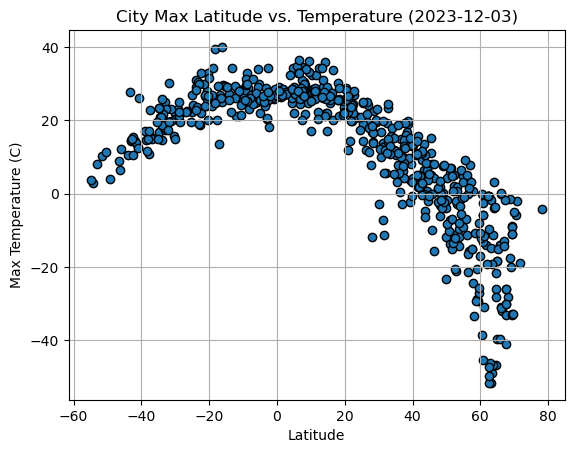

In [8]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df['Lat']
y_axis = city_data_df['Max Temp']
plt.scatter(x_axis, y_axis, edgecolors ='black')
# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature (2023-12-03)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

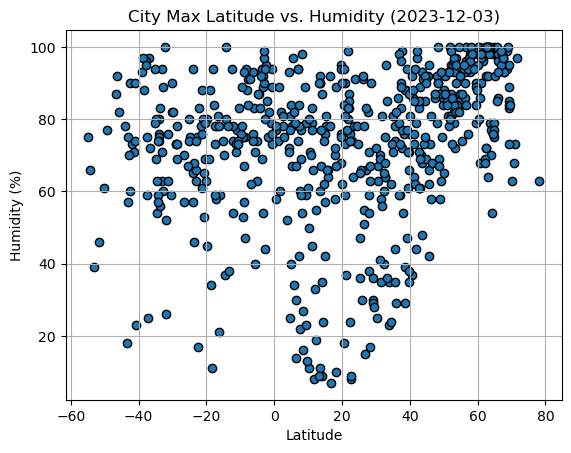

In [9]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df['Lat']
y_axis = city_data_df['Humidity']
plt.scatter(x_axis, y_axis, edgecolors ='black')
# Incorporate the other graph properties
plt.title('City Max Latitude vs. Humidity (2023-12-03)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

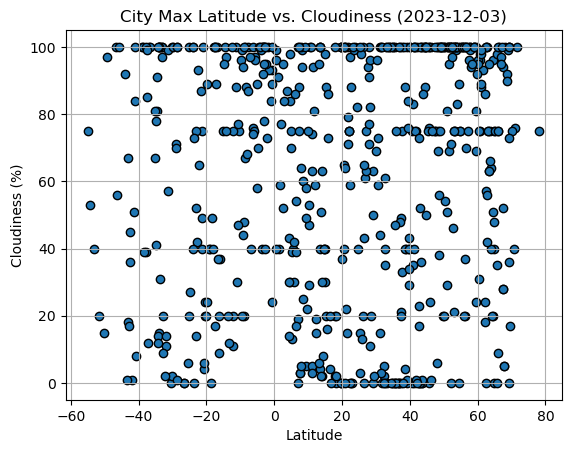

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df['Lat']
y_axis = city_data_df['Cloudiness']
plt.scatter(x_axis, y_axis, edgecolors ='black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Cloudiness (2023-12-03)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

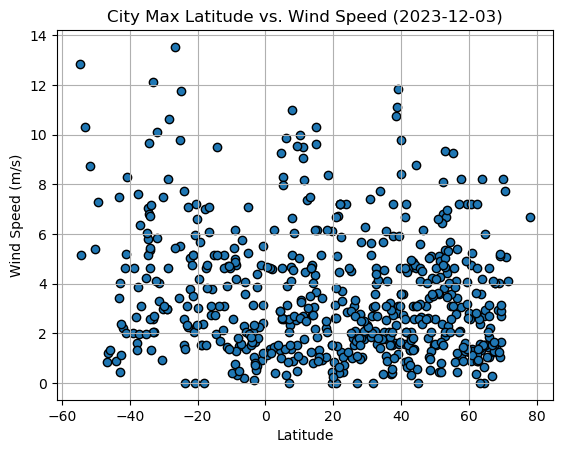

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df['Lat']
y_axis = city_data_df['Wind Speed']
plt.scatter(x_axis, y_axis, edgecolors ='black')
# Incorporate the other graph properties
plt.title('City Max Latitude vs. Wind Speed (2023-12-03)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def regression(item1,item2):
    output = linregress(item1,item2)
    return output

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,qaqortoq,60.7167,-46.0333,-5.91,68,96,4.76,GL,1701786306
2,ust-nera,64.5667,143.2000,-46.71,98,96,2.71,RU,1701786308
5,georgetown,5.4112,100.3354,25.96,97,40,2.57,MY,1701786314
6,tak,16.5833,98.8333,20.13,92,4,0.92,TH,1701786316
7,basoko,1.2391,23.6160,26.43,74,91,1.38,CD,1701786318


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,atafu village,-8.5421,-172.5159,28.74,75,100,4.74,TK,1701786304
3,margaret river,-33.9500,115.0667,14.60,80,15,5.35,AU,1701786165
4,grytviken,-54.2811,-36.5092,2.94,66,53,5.16,GS,1701786312
9,port-aux-francais,-49.3500,70.2167,4.12,77,97,7.28,TF,1701786322
10,adamstown,-25.0660,-130.1015,22.40,80,100,5.51,PN,1701786324


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:-0.8692177626332956


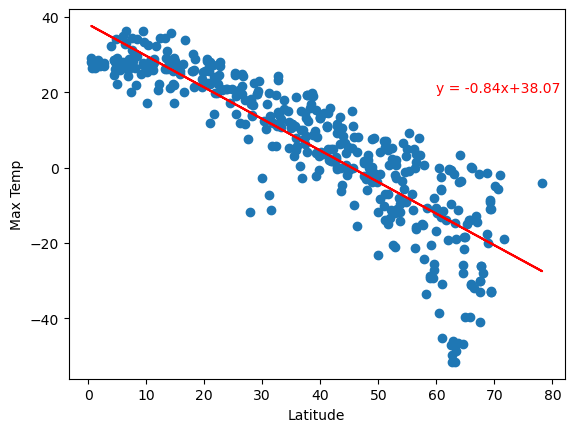

In [15]:
# Linear regression on Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Max Temp']
plt.scatter(x_axis, y_axis)

plt.plot(x_axis,
         (regression(x_axis,y_axis)[0]*x_axis+regression(x_axis,y_axis)[1]),
         color='r')
plt.annotate(f'y = {round(regression(x_axis,y_axis)[0],2)}x+{round(regression(x_axis,y_axis)[1],2)}',
             (60,20),
             color = 'red')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
corr = np.corrcoef(x_axis,y_axis)[0][1]

# Show plot
print(f'The r-value is:{corr}')
plt.show()

The r-value is:0.7129174973424919


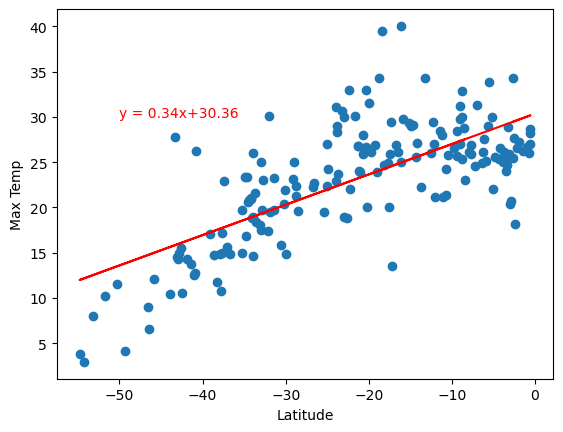

In [16]:
# Linear regression on Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Max Temp']
plt.scatter(x_axis, y_axis)

plt.plot(x_axis,
         (regression(x_axis,y_axis)[0]*x_axis+regression(x_axis,y_axis)[1]),
         color='r')
plt.annotate(f'y = {round(regression(x_axis,y_axis)[0],2)}x+{round(regression(x_axis,y_axis)[1],2)}',
             (-50,30),
             color = 'red')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
corr = np.corrcoef(x_axis,y_axis)[0][1]

# Show plot
print(f'The r-value is:{corr}')
plt.show()


**Discussion about the linear relationship:** 
In northern hemisphere, there's an inverse/negative relationship between latitudes and max temperatures. The more towards the north we go, the smaller the max temperature is. However, it is the opposite for the southern hemisphere, the more we go towards the north (the equator), the bigger the max temperature can be. This shows why the correlation coefficient is negative for the northern hemisphere while it is posibite for the southern one.

### Humidity vs. Latitude Linear Regression Plot

The r-value is:0.4620028576731693


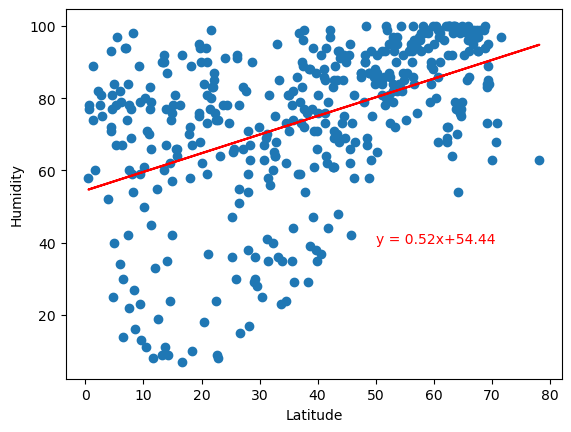

In [17]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Humidity']
plt.scatter(x_axis, y_axis)

plt.plot(x_axis,
         (regression(x_axis,y_axis)[0]*x_axis+regression(x_axis,y_axis)[1]),
         color='r')
plt.annotate(f'y = {round(regression(x_axis,y_axis)[0],2)}x+{round(regression(x_axis,y_axis)[1],2)}',
             (50,40),
             color = 'red')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
corr = np.corrcoef(x_axis,y_axis)[0][1]

# Show plot
print(f'The r-value is:{corr}')
plt.show()

The r-value is:0.16657294726759905


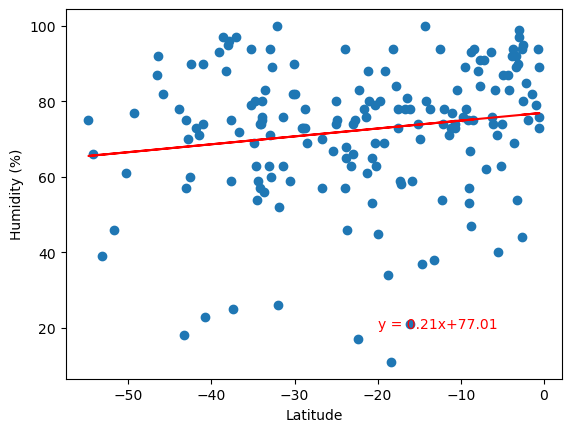

In [18]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Humidity']
plt.scatter(x_axis, y_axis)

plt.plot(x_axis,
         (regression(x_axis,y_axis)[0]*x_axis+regression(x_axis,y_axis)[1]),
         color='r')
plt.annotate(f'y = {round(regression(x_axis,y_axis)[0],2)}x+{round(regression(x_axis,y_axis)[1],2)}',
             (-20,20),
             color = 'red')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
corr = np.corrcoef(x_axis,y_axis)[0][1]

# Show plot
print(f'The r-value is:{corr}')
plt.show()

**Discussion about the linear relationship:**
For both hemimspheres, the relationship between the humidity level and the latitude is slightly positive. The more towards the north we go, the more the humidity level increases. However, that relationship is more predominant for the northern hemisphere which is confirmed by the correlation coefficient. The northern hemisphere's coefficient is bigger than the southern one.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:0.1996270563735096


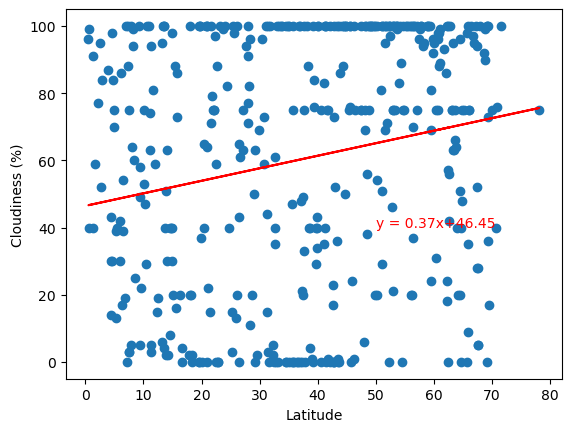

In [19]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Cloudiness']
plt.scatter(x_axis, y_axis)

plt.plot(x_axis,
         (regression(x_axis,y_axis)[0]*x_axis+regression(x_axis,y_axis)[1]),
         color='r')
plt.annotate(f'y = {round(regression(x_axis,y_axis)[0],2)}x+{round(regression(x_axis,y_axis)[1],2)}',
             (50,40),
             color = 'red')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
corr = np.corrcoef(x_axis,y_axis)[0][1]

# Show plot
print(f'The r-value is:{corr}')
plt.show()

The r-value is:0.22112606494072073


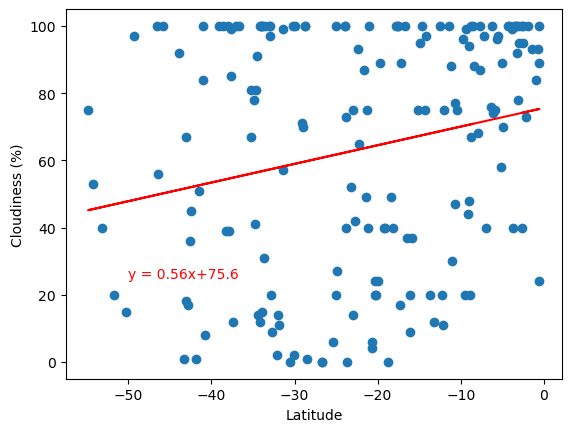

In [20]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Cloudiness']
plt.scatter(x_axis, y_axis)

plt.plot(x_axis,
         (regression(x_axis,y_axis)[0]*x_axis+regression(x_axis,y_axis)[1]),
         color='r')
plt.annotate(f'y = {round(regression(x_axis,y_axis)[0],2)}x+{round(regression(x_axis,y_axis)[1],2)}',
             (-50,25),
             color = 'red')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
corr = np.corrcoef(x_axis,y_axis)[0][1]

# Show plot
print(f'The r-value is:{corr}')
plt.show()

**Discussion about the linear relationship:** 
For both hemisphers, we see a positive relationship with the Latitude and Cloudiness. The higher the latitude, the higher the cloudiness level.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:-0.0715608990946208


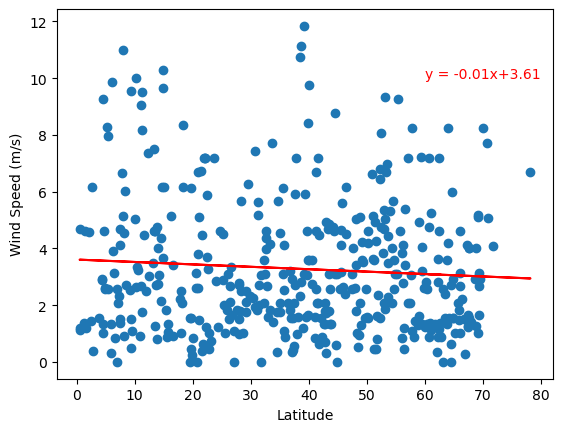

In [21]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Wind Speed']
plt.scatter(x_axis, y_axis)

plt.plot(x_axis,
         (regression(x_axis,y_axis)[0]*x_axis+regression(x_axis,y_axis)[1]),
         color='r')
plt.annotate(f'y = {round(regression(x_axis,y_axis)[0],2)}x+{round(regression(x_axis,y_axis)[1],2)}',
             (60,10),
             color = 'red')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
corr = np.corrcoef(x_axis,y_axis)[0][1]

# Show plot
print(f'The r-value is:{corr}')
plt.show()

The r-value is:-0.3124026083765751


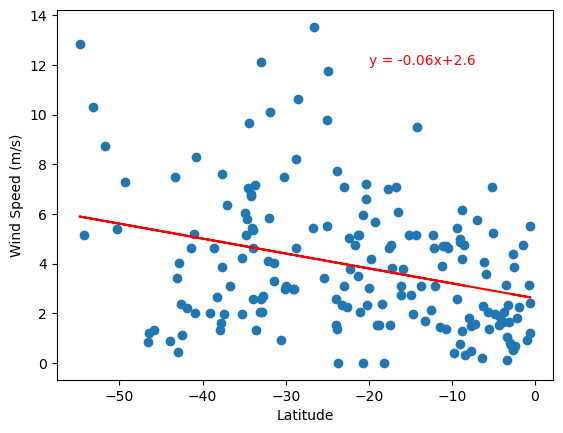

In [22]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Wind Speed']
plt.scatter(x_axis, y_axis)

plt.plot(x_axis,
         (regression(x_axis,y_axis)[0]*x_axis+regression(x_axis,y_axis)[1]),
         color='r')
plt.annotate(f'y = {round(regression(x_axis,y_axis)[0],2)}x+{round(regression(x_axis,y_axis)[1],2)}',
             (-20,12),
             color = 'red')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
corr = np.corrcoef(x_axis,y_axis)[0][1]

# Show plot
print(f'The r-value is:{corr}')
plt.show()

**Discussion about the linear relationship:** Though it is more predominant for the southern hesmisphere, for both hemispheres, we notice a small negative relationship for wind speed and latitude. The souther we go, the less is the wind speed